# Putting it all together

In [1]:
univ_colnum = 12 #change

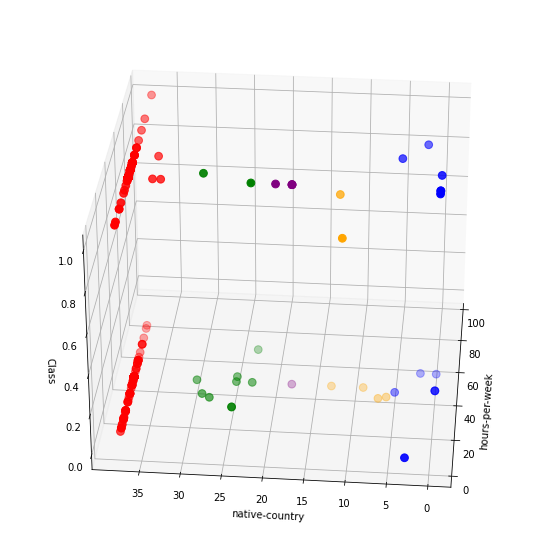

df_presentation:
     hours-per-week native-country  class  label  hours-per-week  \
0               40             38      1      1              40   
1               40             38      1      1              40   
2               40             38      0      1              40   
3               10             38      0      1              10   
4               43             38      1      1              43   
5               40             38      1      1              40   
6               40             38      1      1              40   
7                1              3      0      0               1   
8               40             38      0      1              40   
9               40             18      1      4              40   
10              40             18      1      4              40   
11              40             38      1      1              40   
12              40             38      0      1              40   
13              40             38      0    

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


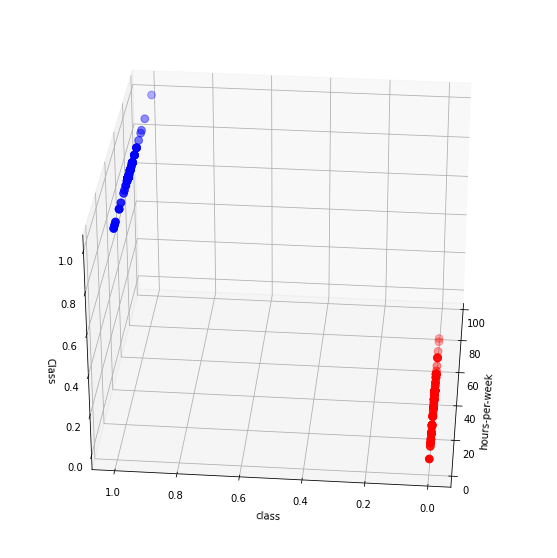

df_presentation:
     hours-per-week  class  class  label  hours-per-week  class color
0               40      1      1      0              40      1  Blue
1               40      1      1      0              40      1  Blue
2               40      0      0      1              40      0   Red
3               10      0      0      1              10      0   Red
4               43      1      1      0              43      1  Blue
5               40      1      1      0              40      1  Blue
6               40      1      1      0              40      1  Blue
7                1      0      0      1               1      0   Red
8               40      0      0      1              40      0   Red
9               40      1      1      0              40      1  Blue
10              40      1      1      0              40      1  Blue
11              40      1      1      0              40      1  Blue
12              40      0      0      1              40      0   Red
13              

IndexError: list index out of range

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import set_option
pd.set_option('max_rows',100)

df = pd.read_csv('Mall_Customers.csv')
mainpath = 'C:/Users/malco/aaPythonPersonalNotebook/DBS Data Scientist Treasury and Market Operations/dataset/'

#adult_data_RenameCol_MinMax_LE_5050
df_orig = pd.read_csv(mainpath + 'adult_data.csv',index_col = 0) #orig

dfy_explanation = pd.read_csv(mainpath + 'adult_data_Binary5050.csv',index_col = 0)
dfy = pd.read_csv(mainpath + 'adult_data_Binary5050_LE.csv',index_col = 0)
dfy_class = dfy['class']

dfy_explanation
colname_final_all = dfy_explanation.columns.to_list()
colname_final_all

desired_col1 = colname_final_all[univ_colnum] #age
for univ_count in range(univ_colnum+1, len(dfy_explanation)):
    desired_col2 = colname_final_all[univ_count] #workclass.. fnlwgt.. native-country

    dfx = dfy[[desired_col1, desired_col2]] 
    dfx.reset_index(drop = True,inplace= True)
    dfy_class.reset_index(drop = True,inplace= True)

    df = pd.concat([dfx,dfy_class],axis=1)

    df.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    df.dropna(inplace=  True, axis=0)
    df = df[:300]

    km = KMeans(n_clusters=5)
    clusters = km.fit_predict(df.iloc[:,1:])
    df["label"] = clusters

    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
    ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
    ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
    ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
    ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

    plt.xlabel(desired_col1)
    plt.ylabel(desired_col2)
    ax.set_zlabel('Class')

    ax.view_init(30, 185)#30, 185
    plt.show()

    df_temp = df.copy()
    df_temp.columns = [desired_col1, desired_col2, 'class', 'label']
    df_temp

    dfy_explanation_temp = dfy_explanation[[desired_col1, desired_col2]][:300]
    dfy_explanation_temp.reset_index(drop = True, inplace= True)
    dfy_explanation_temp
    df_presentation = pd.concat([df_temp, dfy_explanation_temp],axis=1)
    df_presentation

    df_presentation
    def get_label_color(x):
        if x == 0:
            col = 'Blue'
        if x == 1:
            col = 'Red'
        if x == 2:
            col = 'Green'
        if x == 3:
            col = 'Orange'
        if x == 4:
            col = 'Purple'
        return col

    df_presentation['color'] = df_presentation['label']
    df_presentation
    df_presentation['color'] = df_presentation['color'] .apply(lambda x: get_label_color(x))
    print("df_presentation:\n",df_presentation.head(50))
